___
# Ciência dos Dados - PROJETO 1

## Milena Maluli

## Segurança Alimentar no Brasil

___
## Introdução

Esse estudo pretende analisar a relação da casa dos brasileiros com sua segurança alimentar. O material, a ocupação,a  presença de geladeira e água canalizada são alguns aspectos da moradia que estão sendo analizados.
Alêm deles, é visto também a renda desses moradores e se eles ja deixaram de comprar comida por falta de alimento.

Para os valores de renda, vi as rendas menores que 500000, e o valor máximo era de 94669, assim, determinei como limite o 100000


http://g1.globo.com/bemestar/noticia/2014/12/72-milhoes-sofrem-com-inseguranca-alimentar-grave-no-pais-diz-pnad-2013.html


___
## Análise e Resultados

In [284]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [285]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\milen\OneDrive\Documentos\2o SEMESTRE\CDD\CD


In [286]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2009.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('DOM2009csv.zip', compression='zip', header=0, sep=',', quotechar='"')

dados2=pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [287]:
#2009
dados.V4621 = dados.V4621.astype('float')

#dados.V0202 = dados.V0202.astype('category')
dados.V2117 = dados.V2117.astype('category')

dados.V2132 = dados.V2132.astype('category')

dados.V0203 = dados.V0203.astype('category')

dados.V0221 = dados.V0221.astype('category')

dados.V0207 = dados.V0207.astype('category')

dados.V2105 = dados.V2105.astype('category')

dados.V0228 = dados.V0228.astype('category')

In [288]:
#2013

dados2.V4621 = dados.V4621.astype('float')

#dados.V0202 = dados.V0202.astype('category')
dados2.V2117 = dados.V2117.astype('category')

dados2.V2132 = dados.V2132.astype('category')

dados2.V0203 = dados.V0203.astype('category')

dados2.V0221 = dados.V0221.astype('category')

dados2.V0207 = dados.V0207.astype('category')

dados2.V2105 = dados.V2105.astype('category')

dados2.V0228 = dados.V0228.astype('category')

In [289]:
#2009

#dados.V0202.cat.categories = (['Casa', 'Ap','Dom'])
dados.V2117.cat.categories = (['Sim', 'Nao'])
dados.V2132.cat.categories = (['Sim', 'Nao'])
dados.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados.V0221.cat.categories = (['Sim', 'Nao'])
dados.V0207.cat.categories = (['Próprio PAGO', 'Próprio', 'Alugado','Cedido por empregador','Cedido','Outro'])
dados.V2105.cat.categories = (['Sim', 'Nao'])
dados.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Nao'])
dados.V2117.cat.categories = (['Sim', 'Nao'])
#dados.V2132.cat.categories = (['Sim', 'Nao']) so p quem tem menos de 17, tirei

In [290]:
#2013

#dados.V0202.cat.categories = (['Casa', 'Ap','Dom'])
dados2.V2117.cat.categories = (['Sim', 'Nao'])
dados2.V2132.cat.categories = (['Sim', 'Nao'])
dados2.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados2.V0221.cat.categories = (['Sim', 'Nao'])
dados2.V0207.cat.categories = (['Próprio PAGO', 'Próprio', 'Alugado','Cedido por empregador','Cedido','Outro'])
dados2.V2105.cat.categories = (['Sim', 'Nao'])
dados2.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Nao'])
dados2.V2117.cat.categories = (['Sim', 'Nao'])
#dados.V2132.cat.categories = (['Sim', 'Nao']) so p quem tem menos de 17, tirei

In [291]:

#dados.loc[(dados.V2117=='Sim') & (dados.V2132=='Sim'),'SENTIUFOME'] = 'Sim'
#dados.loc[(dados.V2117=='Nao') | (dados.V2132=='Nao'),'SENTIUFOME'] = 'Nao'

In [292]:
d= dados.loc[:,["V4621","V0207","V0203","V0221","V0228","V2117","V2105"]]
d2=dados2.loc[:,["V4621","V0207","V0203","V0221","V0228","V2117","V2105"]]

In [293]:
print('2009')
d.columns = ['RENDA','OCUPAÇÃO','MATERIAL', 'AGUA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d=d.dropna(subset=['RENDA'])
d=d[d.RENDA<100000]
d.head()

2009


,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao


In [294]:
print('2013')
d2.columns = ['RENDA','OCUPAÇÃO','MATERIAL', 'AGUA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d2=d2.dropna(subset=['RENDA'])
d2=d2[d2.RENDA<100000]
d2.head()

2013


,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao


In [295]:
d.to_csv('DataFramee1.csv', sep=';')


### MATERIAL DA CASA X FALTA DA ALIMENTO POR DINHEIRO


Qual a relação do material da casa e a quantidade de pessoas que tem falta de alimento por não poder comprar? 
Tem casas feitas de material mais caro mas que mesmo assim sente falta por não ter dinheiro?
Qual o material de casa em que mais ocorre a falta por dinheiro?

Falta al por $         Sim        Nao
MATERIAL                             
Alven            16.683853  83.316147
Mad Aparelhada   20.882921  79.117079
Taipa            53.185328  46.814672
Mad Aproveitada  37.795276  62.204724
Palha            38.888889  61.111111
Outro Material   34.391534  65.608466
All              17.532042  82.467958


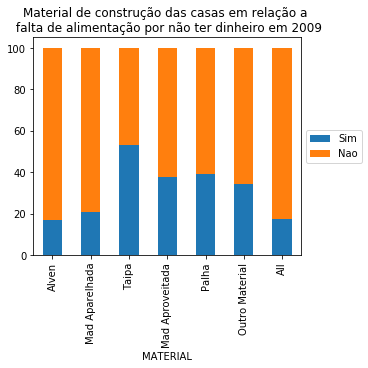

In [311]:
ctrf= (pd.crosstab(d.MATERIAL,d.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
print(ctrf)
ctrf.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2009')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Falta al por $         Sim        Nao
MATERIAL                             
Alven            16.857238  83.142762
Mad Aparelhada   20.904645  79.095355
Taipa            53.236715  46.763285
Mad Aproveitada  37.634409  62.365591
Palha            38.888889  61.111111
Outro Material   34.574468  65.425532
All              17.715338  82.284662


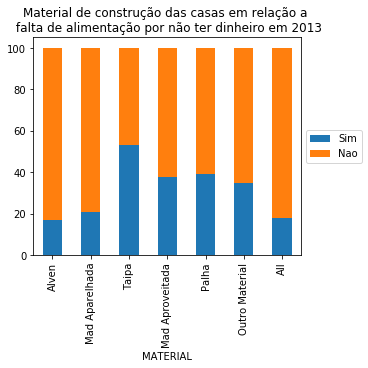

In [312]:
ctrf2= (pd.crosstab(d2.MATERIAL,d2.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
print(ctrf2)
ctrf2.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2013')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### RENDA X FALTA DE ALIMENTO POR DINHEIRO

Relação da Renda e falta de alimento por dinheiro.
Quanto maior a renda, menor a falta de alimento por dinheiro?

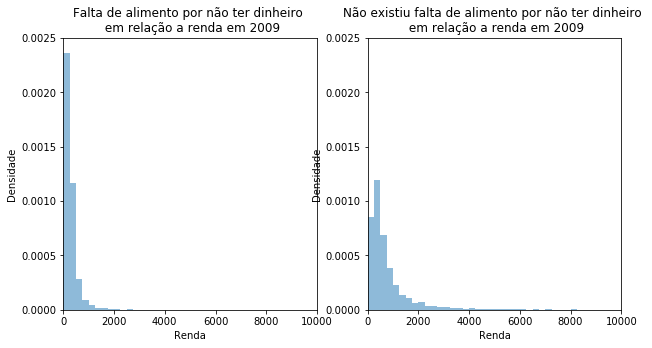

In [313]:
faixa = arange(0,100000,250)

plt.subplot(121)
plot = d.RENDA[d.FALTAAL=='Sim'].plot.hist(bins=faixa,title='HISTOGRAMA FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Falta de alimento por não ter dinheiro \n em relação a renda em 2009')

plt.subplot(122)
plot = d.RENDA[d.FALTAAL=='Nao'].plot.hist(bins=faixa,title='HISTOGRAMA SEM FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Não existiu falta de alimento por não ter dinheiro \n em relação a renda em 2009')

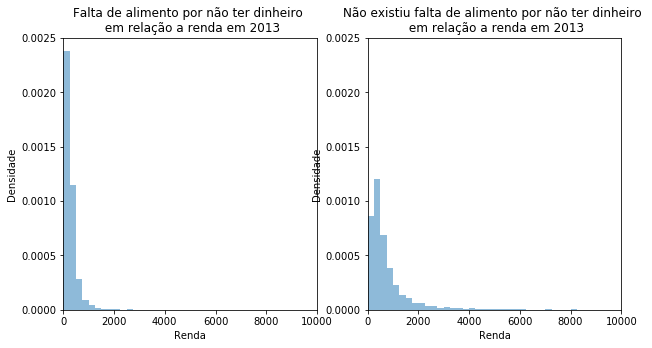

In [315]:
faixa = arange(0,100000,250)

plt.subplot(121)
plot = d2.RENDA[d2.FALTAAL=='Sim'].plot.hist(bins=faixa,title='HISTOGRAMA FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Falta de alimento por não ter dinheiro \n em relação a renda em 2013')

plt.subplot(122)
plot = d2.RENDA[d2.FALTAAL=='Nao'].plot.hist(bins=faixa,title='HISTOGRAMA SEM FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Não existiu falta de alimento por não ter dinheiro \n em relação a renda em 2013')

### GELADEIRA X FOME

As pessoas que tem geladeira passam fome, mais das que não tem?

SENTIUFOME          Sim        Nao
GELADEIRA                         
Sim, 2portas  10.628183  89.371817
Sim, 1porta   18.779499  81.220501
Nao           36.317973  63.682027
All           19.638724  80.361276


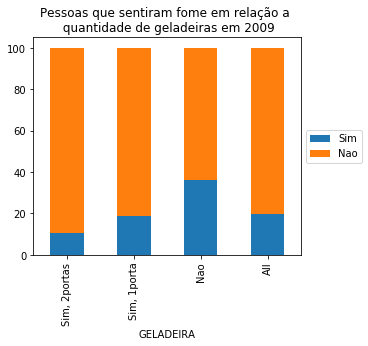

In [309]:
ctgf= (pd.crosstab(d.GELADEIRA,d.SENTIUFOME,margins=True,rownames=['GELADEIRA'], colnames=['SENTIUFOME'], normalize='index')*100)
print(ctgf)
ctgf.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome em relação a \n quantidade de geladeiras em 2009')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


SENTIUFOME          Sim        Nao
GELADEIRA                         
Sim, 2portas  10.723813  89.276187
Sim, 1porta   18.856949  81.143051
Nao           36.371662  63.628338
All           19.775029  80.224971


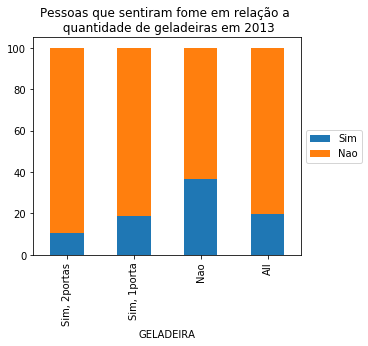

In [310]:
ctgf2= (pd.crosstab(d2.GELADEIRA,d2.SENTIUFOME,margins=True,rownames=['GELADEIRA'], colnames=['SENTIUFOME'], normalize='index')*100)
print(ctgf2)
ctgf2.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome em relação a \n quantidade de geladeiras em 2013')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


###  ÁGUA CANALIZADA X FOME

retirar fome

### OCUPAÇÃO X RENDA

Como elas se relacionam? 

(0, 10000)

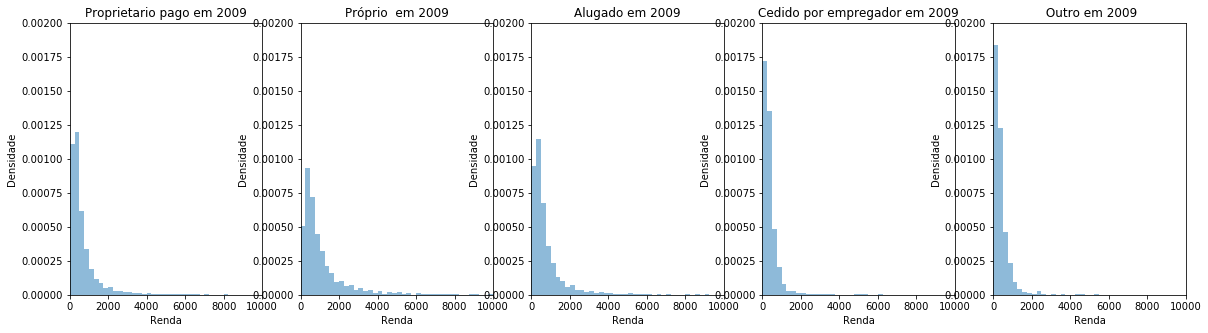

In [317]:
faixa = arange(0,100000,250)

plt.subplot(151)
plot = d.RENDA[d.OCUPAÇÃO=='Próprio PAGO'].plot.hist(bins=faixa,title='Proprietario pago em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(152)
plot = d.RENDA[d.OCUPAÇÃO=='Próprio'].plot.hist(bins=faixa,title='Próprio  em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(153)
plot = d.RENDA[d.OCUPAÇÃO=='Alugado'].plot.hist(bins=faixa,title='Alugado em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(154)
plot = d.RENDA[d.OCUPAÇÃO=='Cedido por empregador'].plot.hist(bins=faixa,title='Cedido por empregador em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(155)
plot = d.RENDA[d.OCUPAÇÃO=='Outro'].plot.hist(bins=faixa,title=' Outro em 2009',figsize=(20,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)



(0, 10000)

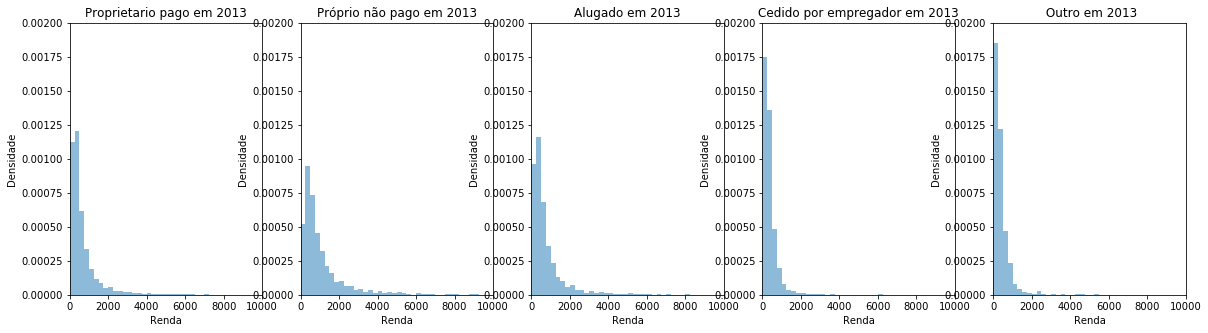

In [316]:
faixa = arange(0,100000,250)

plt.subplot(151)
plot = d2.RENDA[d.OCUPAÇÃO=='Próprio PAGO'].plot.hist(bins=faixa,title='Proprietario pago em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(152)
plot = d2.RENDA[d.OCUPAÇÃO=='Próprio'].plot.hist(bins=faixa,title='Próprio não pago em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(153)
plot = d2.RENDA[d.OCUPAÇÃO=='Alugado'].plot.hist(bins=faixa,title='Alugado em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(154)
plot = d2.RENDA[d.OCUPAÇÃO=='Cedido por empregador'].plot.hist(bins=faixa,title='Cedido por empregador em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)

plt.subplot(155)
plot = d2.RENDA[d.OCUPAÇÃO=='Outro'].plot.hist(bins=faixa,title=' Outro em 2013',figsize=(20,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.002)
plt.xlim(0,10000)


### RENDA  X   ÁGUA + GELADEIRA

In [301]:
#INFRAESTRUTURA

d.loc[(d.AGUA=='Sim') & (d.GELADEIRA=='Sim, 2portas'),'INFRAESTRUTURA'] = 'Sim'
d.loc[(d.AGUA=='Sim') & (d.GELADEIRA=='Sim, 1porta'),'INFRAESTRUTURA'] = 'Sim'
d.loc[(d.AGUA=='Nao') | (d.GELADEIRA=='Nao'),'INFRAESTRUTURA'] = 'Nao'
d.head()

,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL,INFRAESTRUTURA
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao,Sim
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao,Sim
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao,Sim
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao,Sim


In [302]:
#RENDA
d.RENDA.describe()

count    117827.000000
mean        760.880605
std        1355.601794
min           0.000000
25%         232.000000
50%         451.000000
75%         797.000000
max       94669.000000
Name: RENDA, dtype: float64

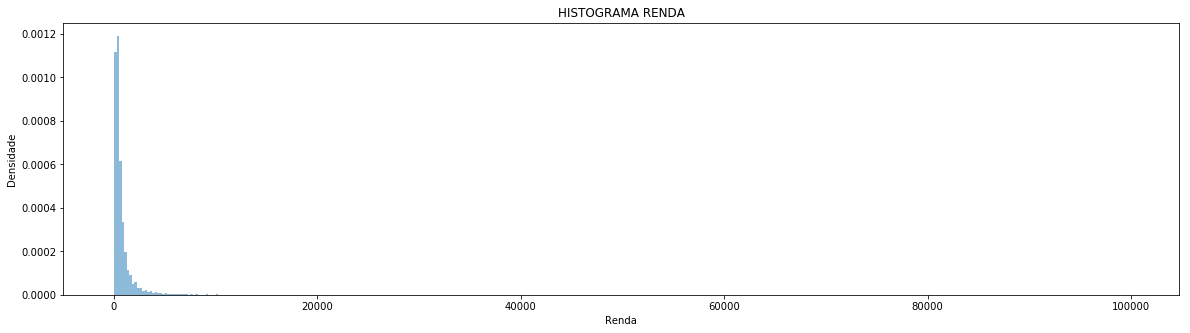

In [303]:
# k= raiz de 121163 = 348 = 350
# amplitude= 94669
#270 
faixa = arange(0,100000,250)

plot = d.RENDA.plot.hist(bins=faixa,title='HISTOGRAMA RENDA',figsize=(20,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')


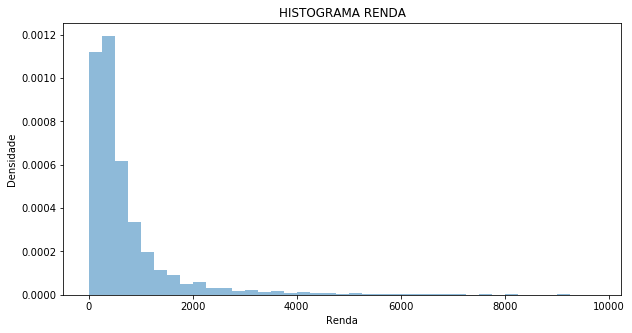

In [304]:
faixa = arange(0,10000,250)

plot = d.RENDA.plot.hist(bins=faixa,title='HISTOGRAMA RENDA',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

(0, 10000)

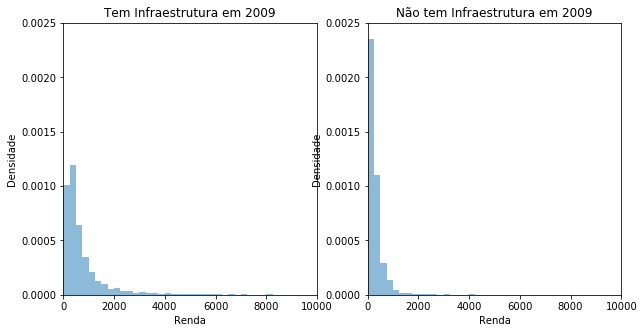

In [320]:

plt.subplot(121)
plot = d.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)


plt.subplot(122)
plot = d.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)

(0, 10000)

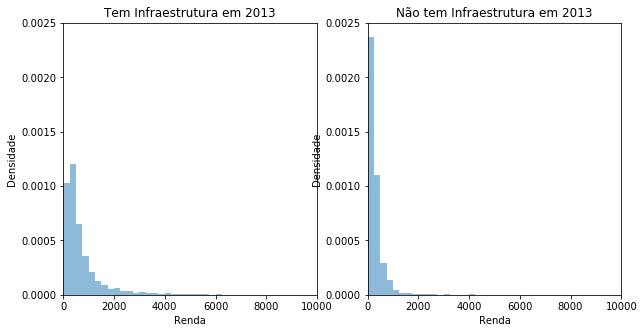

In [322]:
d2.loc[(d2.AGUA=='Sim') & (d2.GELADEIRA=='Sim, 2portas'),'INFRAESTRUTURA'] = 'Sim'
d2.loc[(d2.AGUA=='Sim') & (d2.GELADEIRA=='Sim, 1porta'),'INFRAESTRUTURA'] = 'Sim'
d2.loc[(d2.AGUA=='Nao') | (d2.GELADEIRA=='Nao'),'INFRAESTRUTURA'] = 'Nao'
d2.head()


plt.subplot(121)
plot = d2.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)

plt.subplot(122)
plot = d2.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)

In [329]:
d


,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL,INFRAESTRUTURA
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao,Sim
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao,Sim
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao,Sim
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao,Sim
8,59.0,Alugado,Mad Aparelhada,Sim,"Sim, 1porta",Nao,Sim,Sim
9,6512.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",Nao,Nao,Sim
10,87.0,Alugado,Mad Aparelhada,Sim,"Sim, 2portas",Nao,Sim,Sim
12,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao,Sim
13,0.0,Cedido,Alven,Sim,"Sim, 1porta",NaN,Nao,Sim


___
## Conclusão 

Descreva aqui suas conclusões!